<a href="https://colab.research.google.com/github/AngelKociankowski/MIA/blob/main/Actividad4EDA_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Angel Sebastian Kociankowski Montelongo
*   MATRÍCULA: ----------------------------------------------------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 4/Actividad4_EDA"
os.makedirs(DIR, exist_ok=True)
os.chdir(DIR)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("credit_risk_dataset (1).csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [6]:
df.info()
num_columns = df.select_dtypes(include=['number']).shape[1]
qual_columns = df.select_dtypes(exclude=['number']).shape[1]
print(f"Columnas numéricas: {num_columns}")
print(f"Columnas cualitativas: {qual_columns}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
Columnas numéricas: 8
Columnas 

 2. Determina el porcentaje de valores faltantes por columna.

---



In [13]:
missing_percentage = df.isnull().mean() * 100
print("Porcentaje de valores faltantes por columna:")
print(missing_percentage)

Porcentaje de valores faltantes por columna:
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [7]:
descriptive_stats = df.describe()

numeric_columns = df.select_dtypes(include=['number'])
skewness = numeric_columns.skew()   # Asimetría
kurtosis = numeric_columns.kurt()   # Curtosis

person_age_stats = {
    'mean': df['person_age'].mean(),
    'median': df['person_age'].median(),
    'skewness': skewness['person_age'],
    'kurtosis': kurtosis['person_age']
}

loan_int_rate_stats = {
    'mean': df['loan_int_rate'].mean(),
    'median': df['loan_int_rate'].median(),
    'skewness': skewness['loan_int_rate'],
    'kurtosis': kurtosis['loan_int_rate']
}

print("Estadísticas descriptivas generales:\n", descriptive_stats)
print("\nAsimetría:\n", skewness)
print("\nCurtosis:\n", kurtosis)
print("\nPerson Age Stats:", person_age_stats)
print("\nLoan Int Rate Stats:", loan_int_rate_stats)

Estadísticas descriptivas generales:
          person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

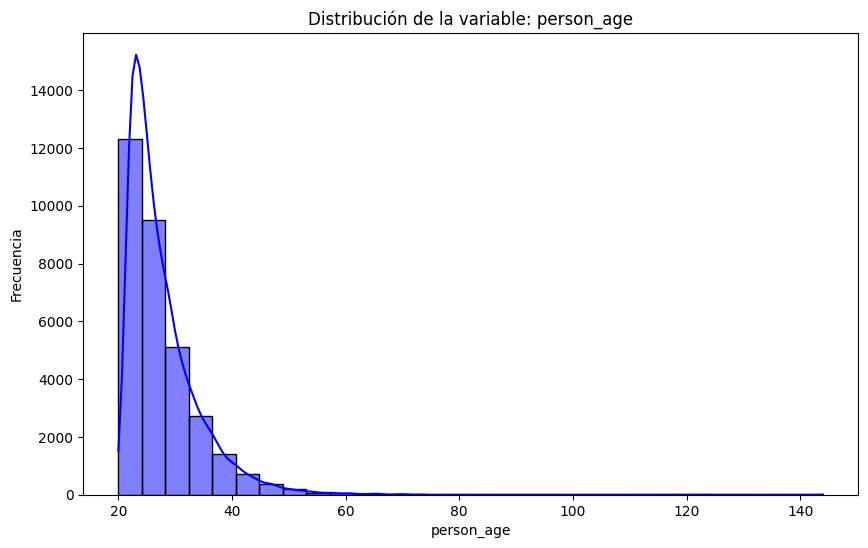

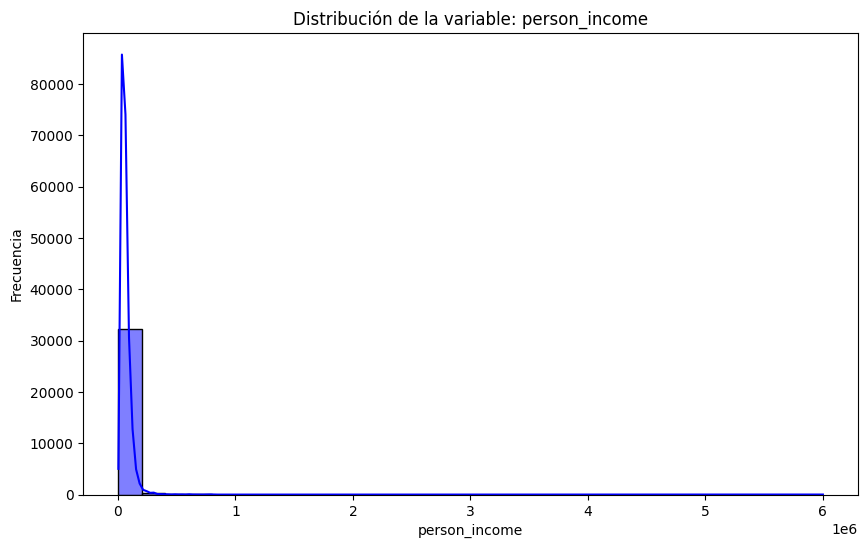

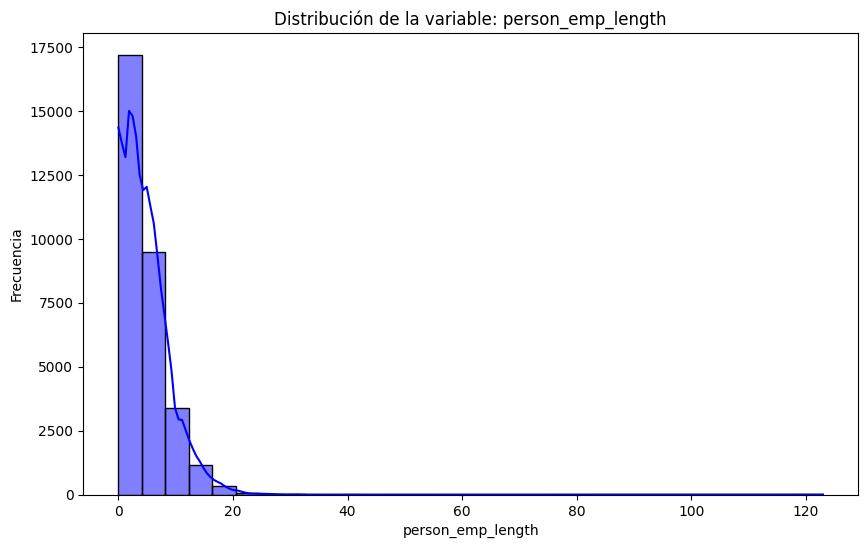

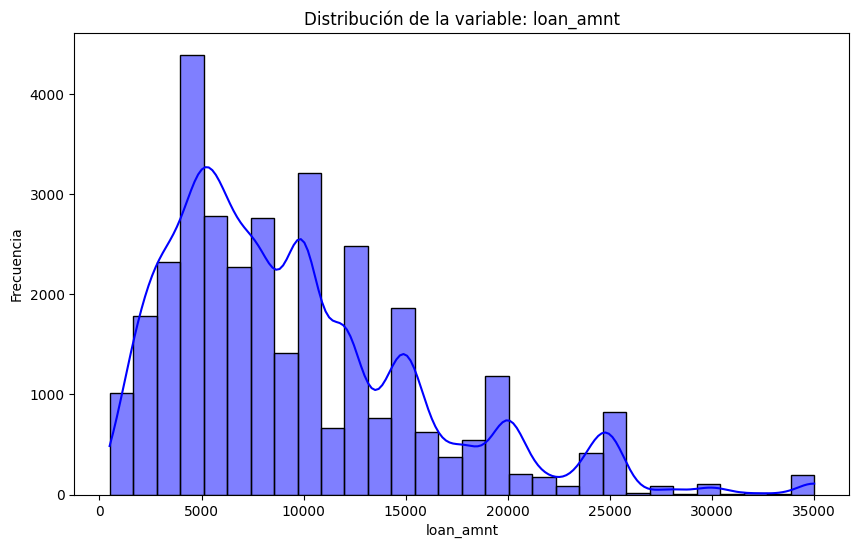

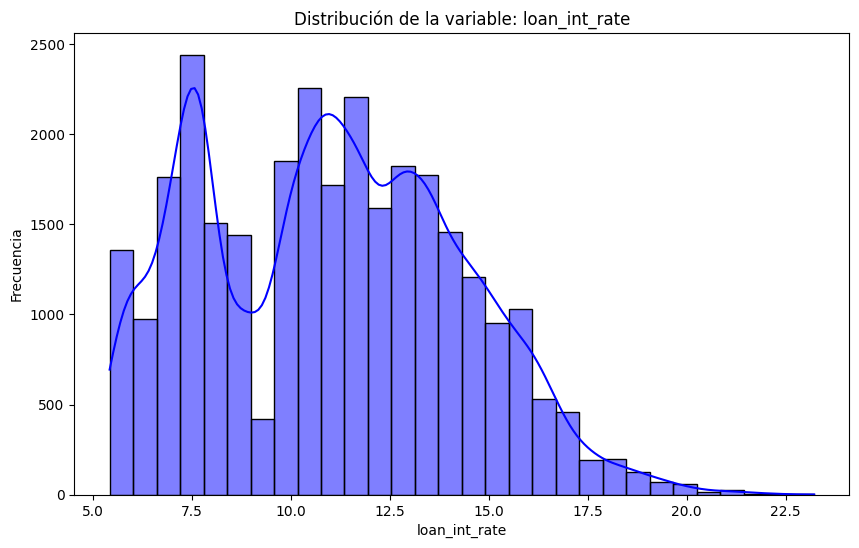

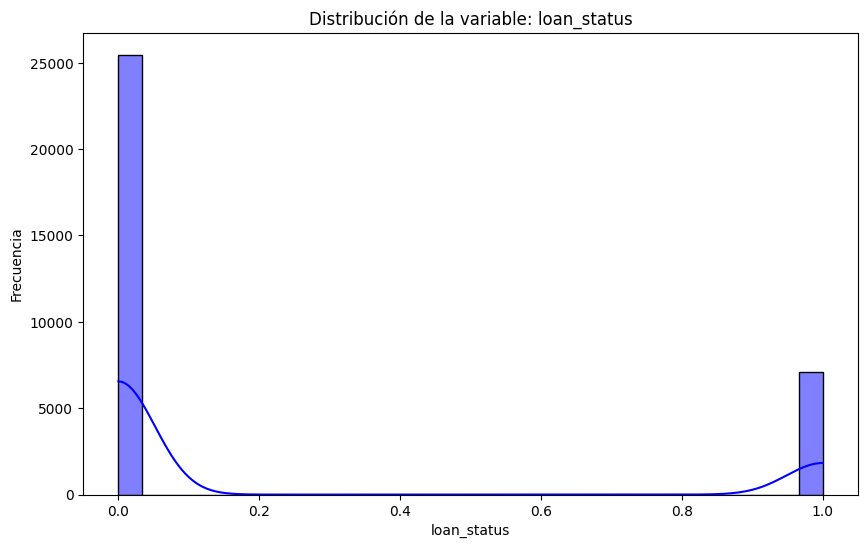

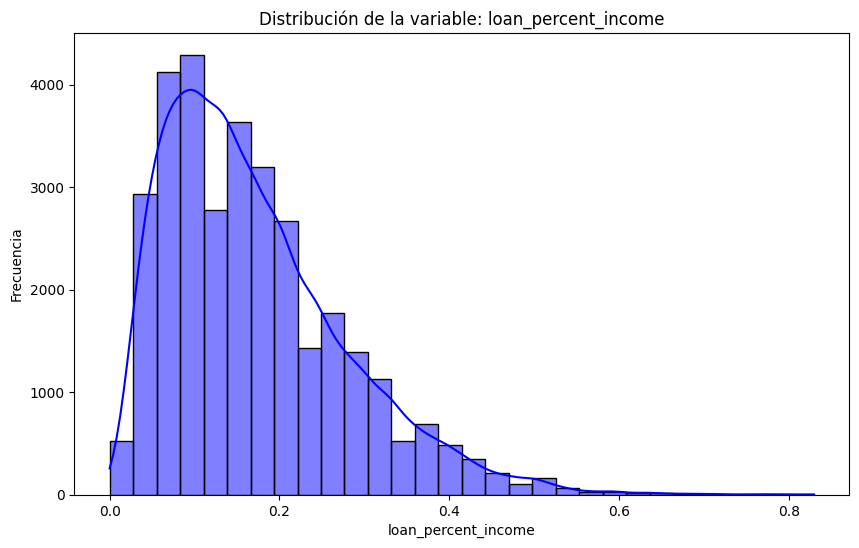

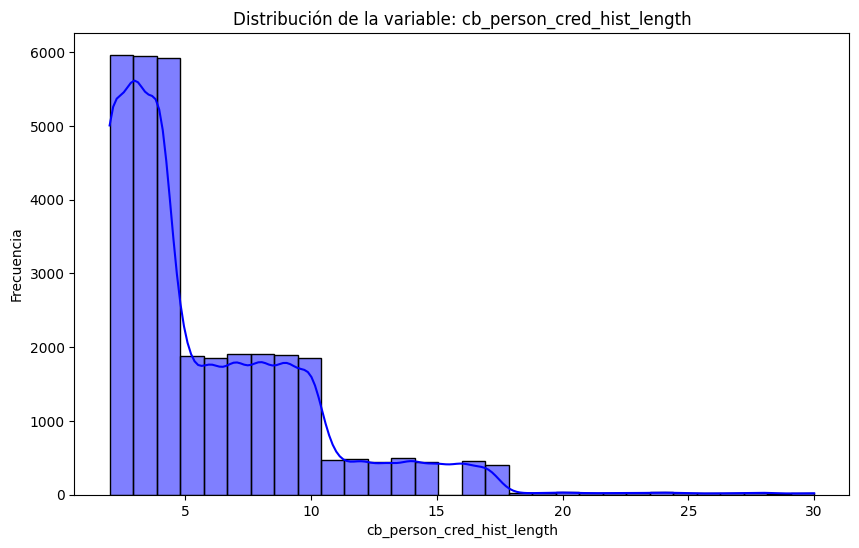

In [8]:

numeric_columns = df.select_dtypes(include=['number'])

for column in numeric_columns.columns:
    plt.figure(figsize=(10, 6))


    sns.histplot(numeric_columns[column], kde=True, bins=30, color='blue', edgecolor='black')


    plt.title(f'Distribución de la variable: {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')


    plt.show()

`5. Emplea b`oxplots para mostrar la distribución de los datos a través de sus cuartiles.

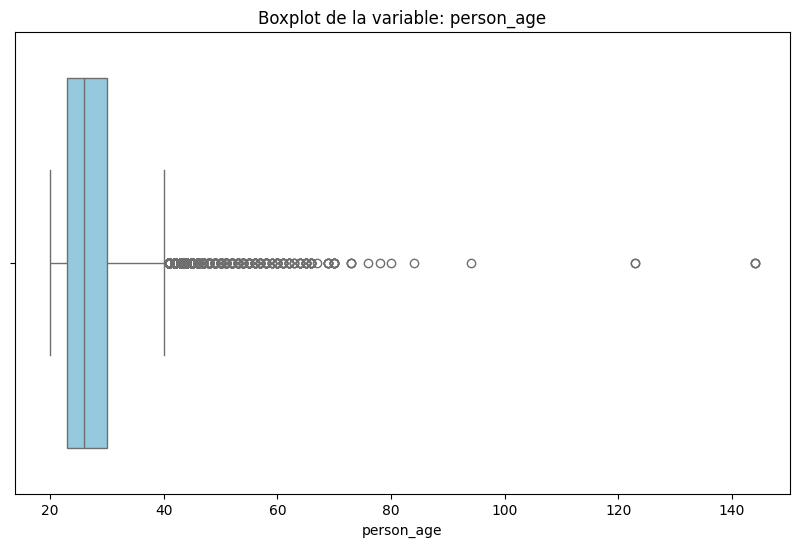

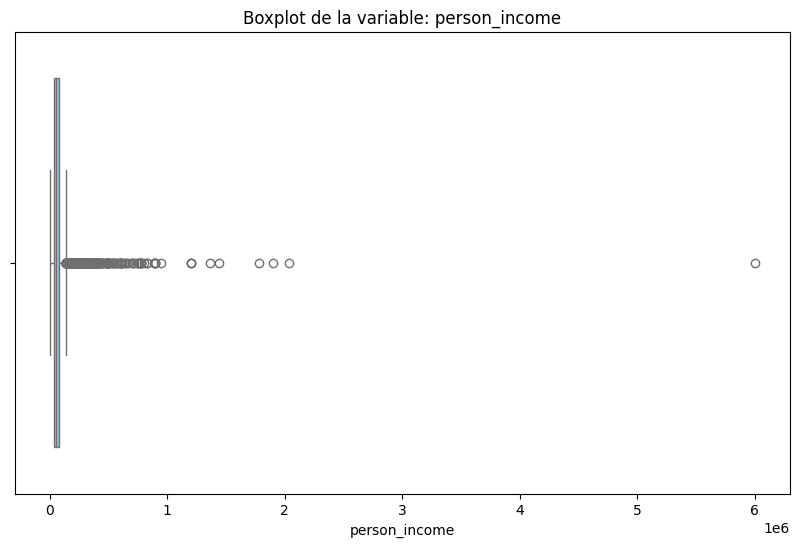

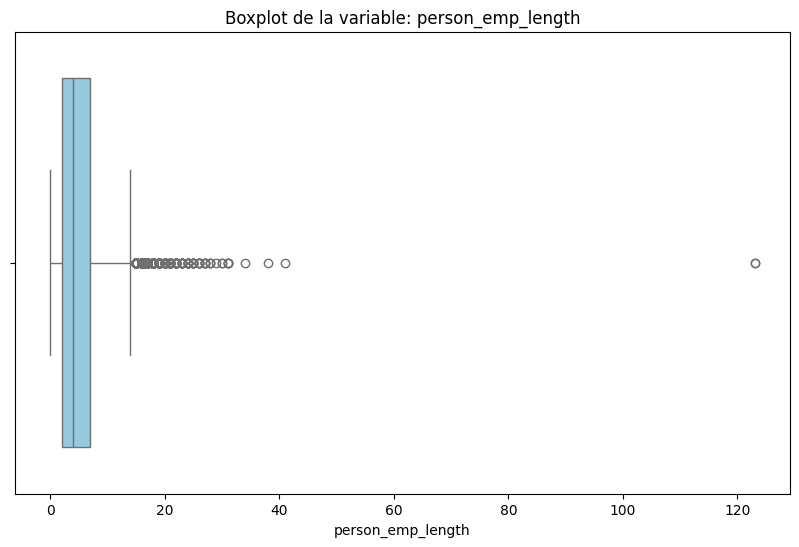

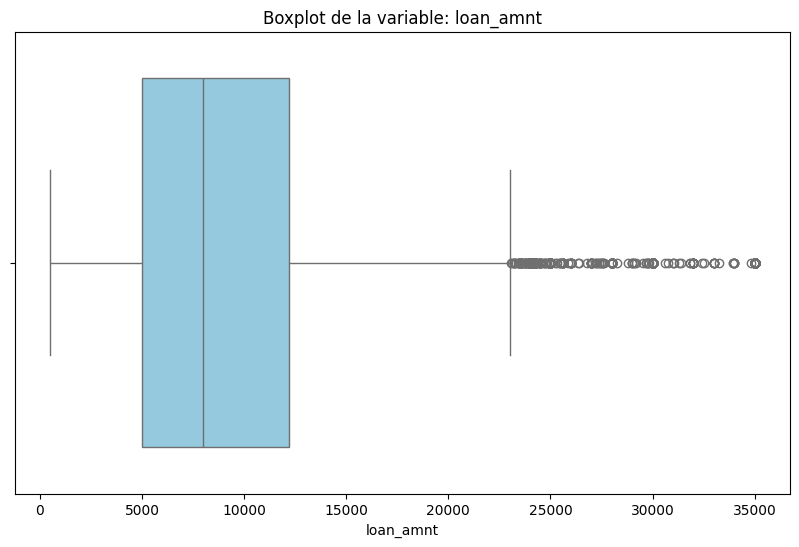

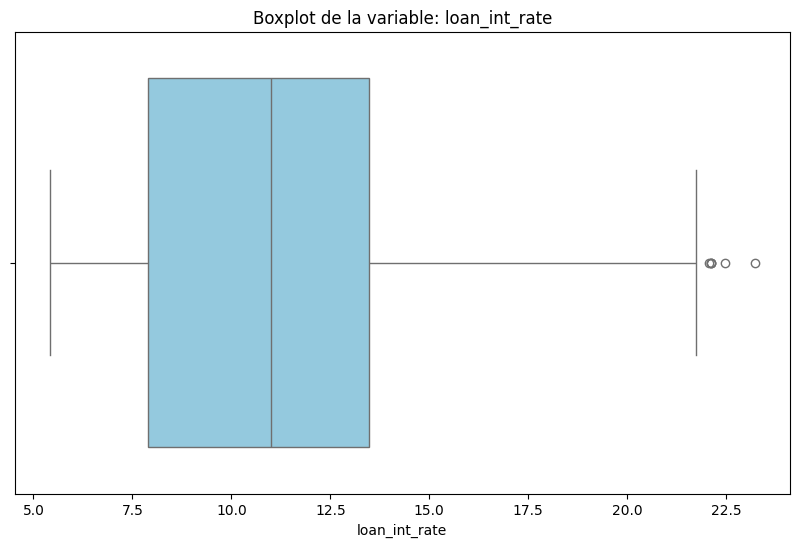

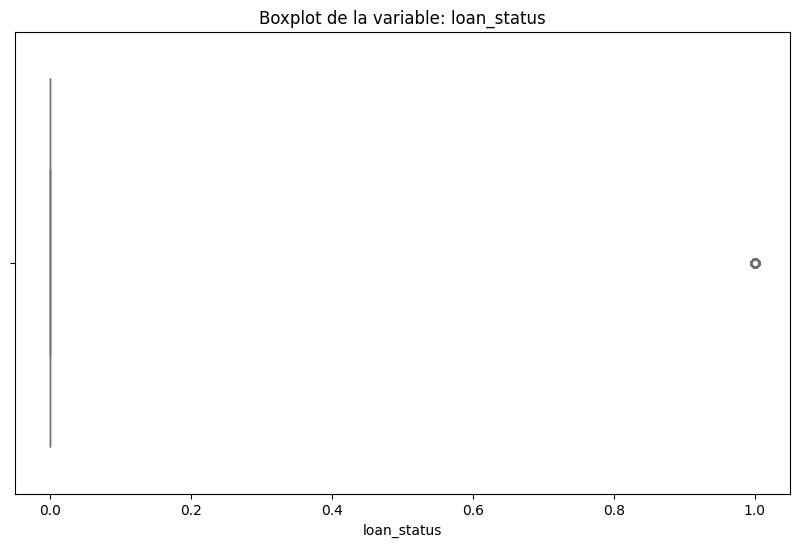

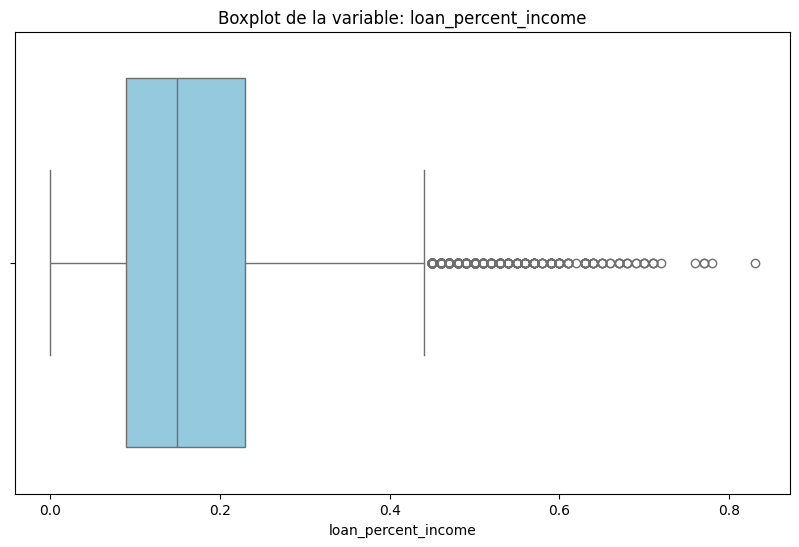

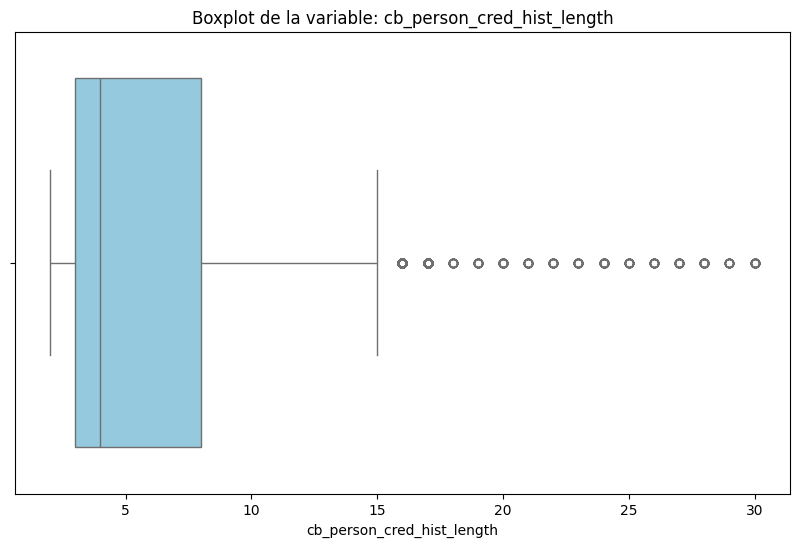

In [9]:

for column in numeric_columns.columns:
    plt.figure(figsize=(10, 6))


    sns.boxplot(x=numeric_columns[column], color='skyblue')


    plt.title(f'Boxplot de la variable: {column}')
    plt.xlabel(column)


    plt.show()

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [10]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [11]:
text_stats = df.describe(include='object')

modes = df.select_dtypes(include='object').mode().iloc[0]
unique_counts = df.select_dtypes(include='object').nunique()


print("Estadísticas descriptivas para variables de texto:\n", text_stats)
print("\nModa de cada variable de texto:\n", modes)
print("\nCantidad de valores únicos por variable:\n", unique_counts)

for column in df.select_dtypes(include='object').columns:
    print(f"\nRecuentos únicos para la variable '{column}':")
    print(df[column].value_counts())

Estadísticas descriptivas para variables de texto:
        person_home_ownership loan_intent loan_grade cb_person_default_on_file
count                  32581       32581      32581                     32581
unique                     4           6          7                         2
top                     RENT   EDUCATION          A                         N
freq                   16446        6453      10777                     26836

Moda de cada variable de texto:
 person_home_ownership             RENT
loan_intent                  EDUCATION
loan_grade                           A
cb_person_default_on_file            N
Name: 0, dtype: object

Cantidad de valores únicos por variable:
 person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

Recuentos únicos para la variable 'person_home_ownership':
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count

7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

<ipython-input-12-f9787b4a4f51>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


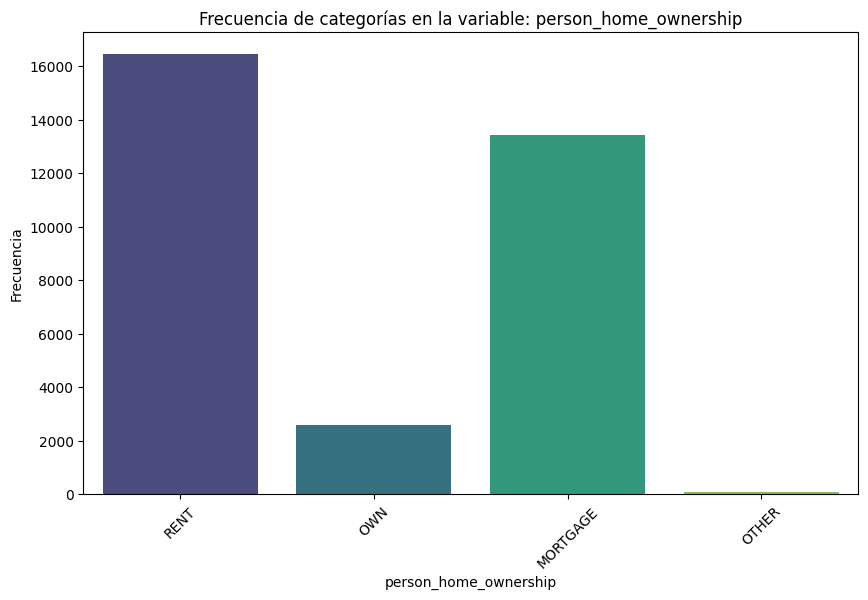

<ipython-input-12-f9787b4a4f51>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


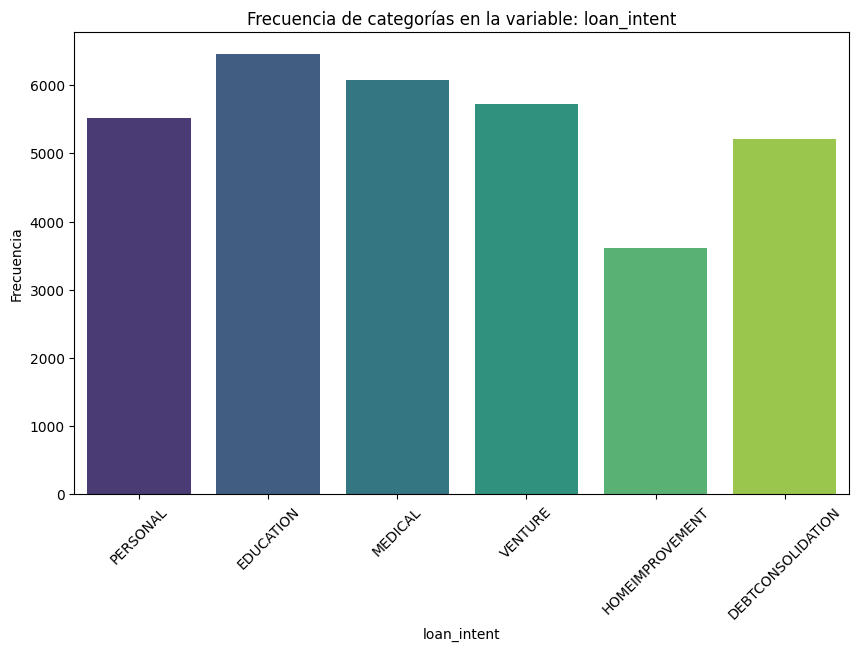

<ipython-input-12-f9787b4a4f51>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


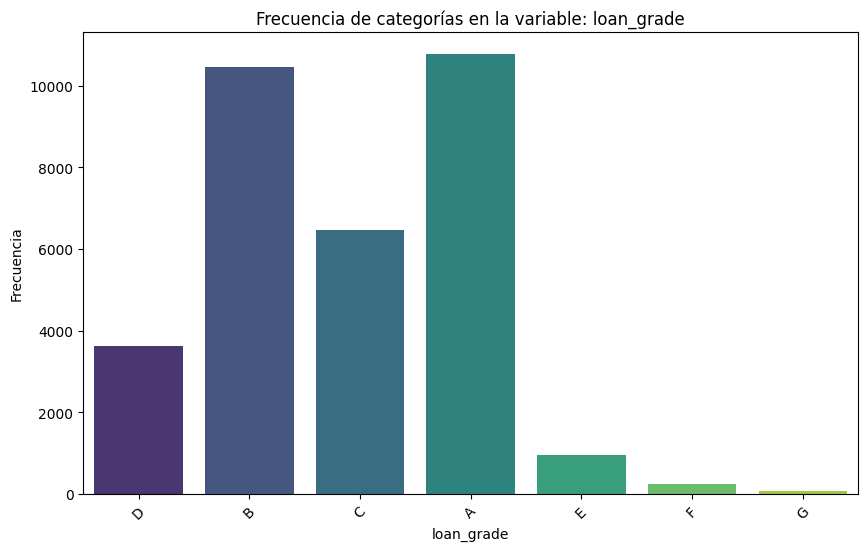

<ipython-input-12-f9787b4a4f51>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


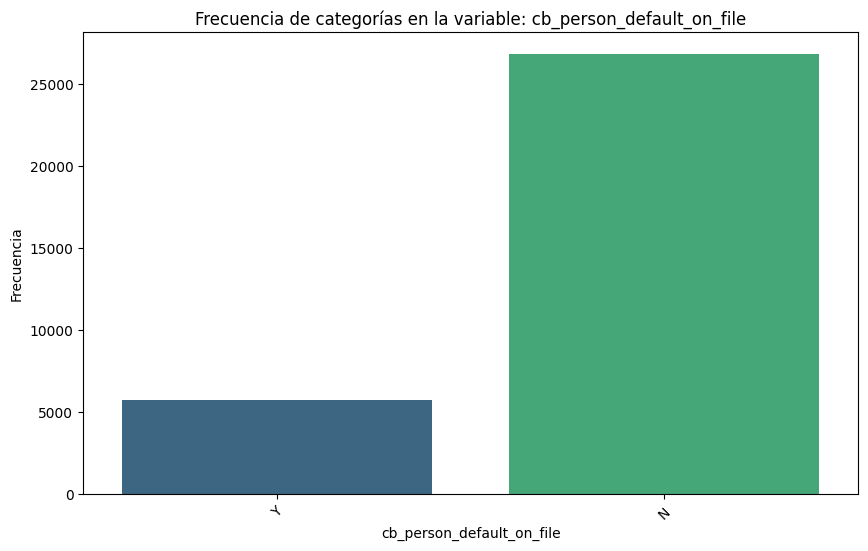

In [12]:

text_columns = df.select_dtypes(include='object').columns

for column in text_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Frecuencia de categorías en la variable: {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

<ipython-input-13-baf0206208d1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_percent_income', data=df, palette='muted')


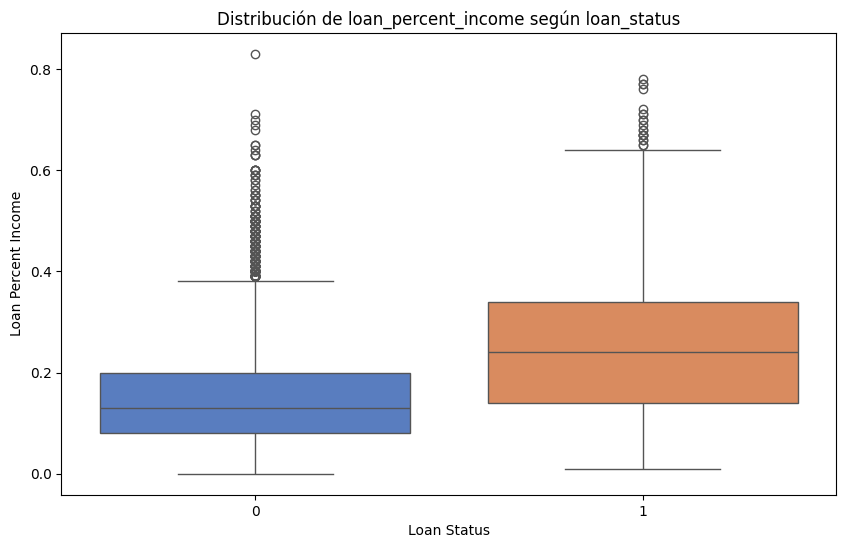

In [13]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='loan_status', y='loan_percent_income', data=df, palette='muted')

plt.title('Distribución de loan_percent_income según loan_status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Percent Income')

plt.show()


[link text](https://) 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

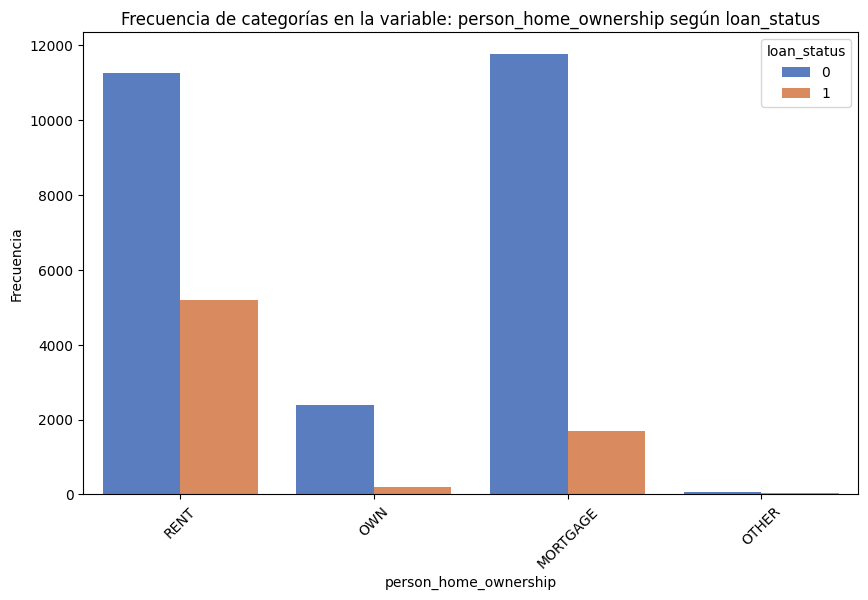

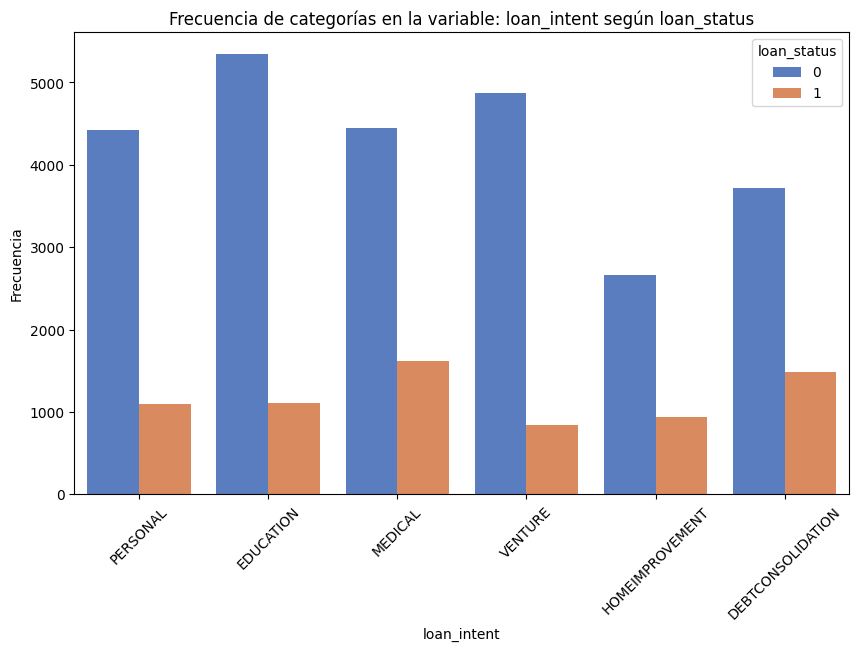

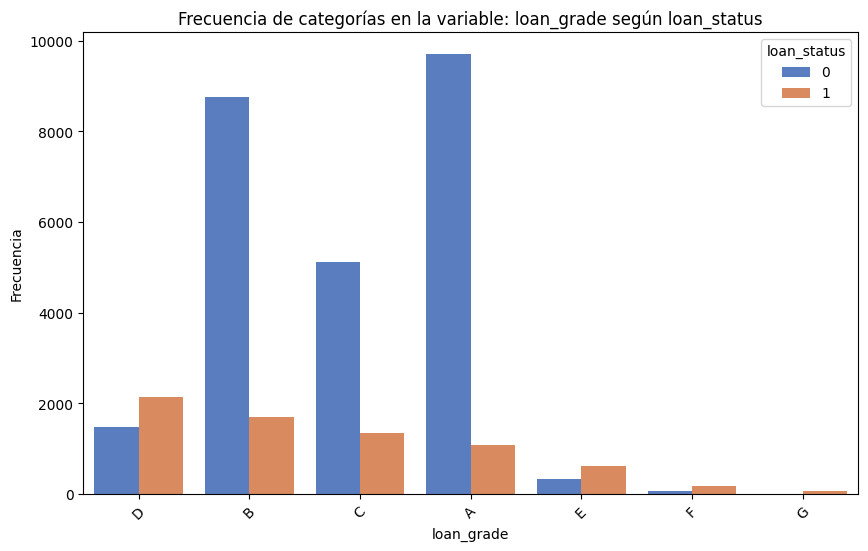

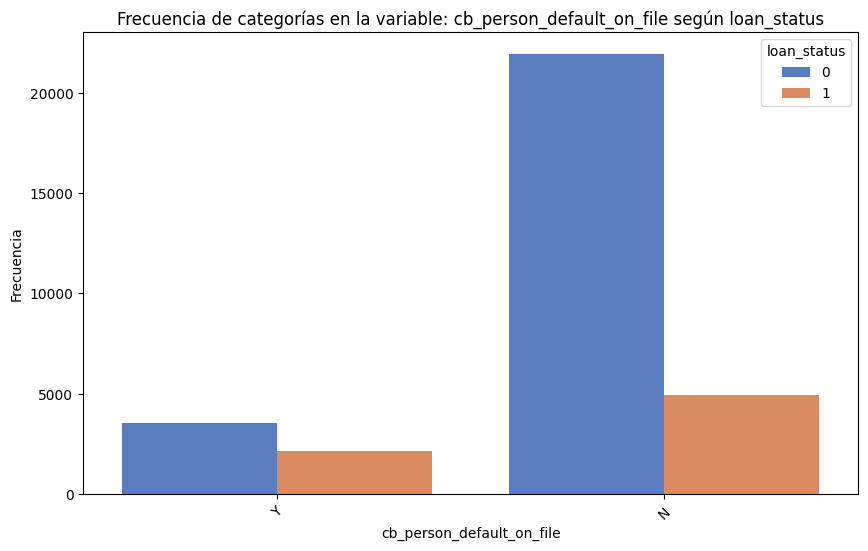

In [14]:
text_columns = df.select_dtypes(include='object').columns

for column in text_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df, hue='loan_status', palette='muted')
    plt.title(f'Frecuencia de categorías en la variable: {column} según loan_status')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

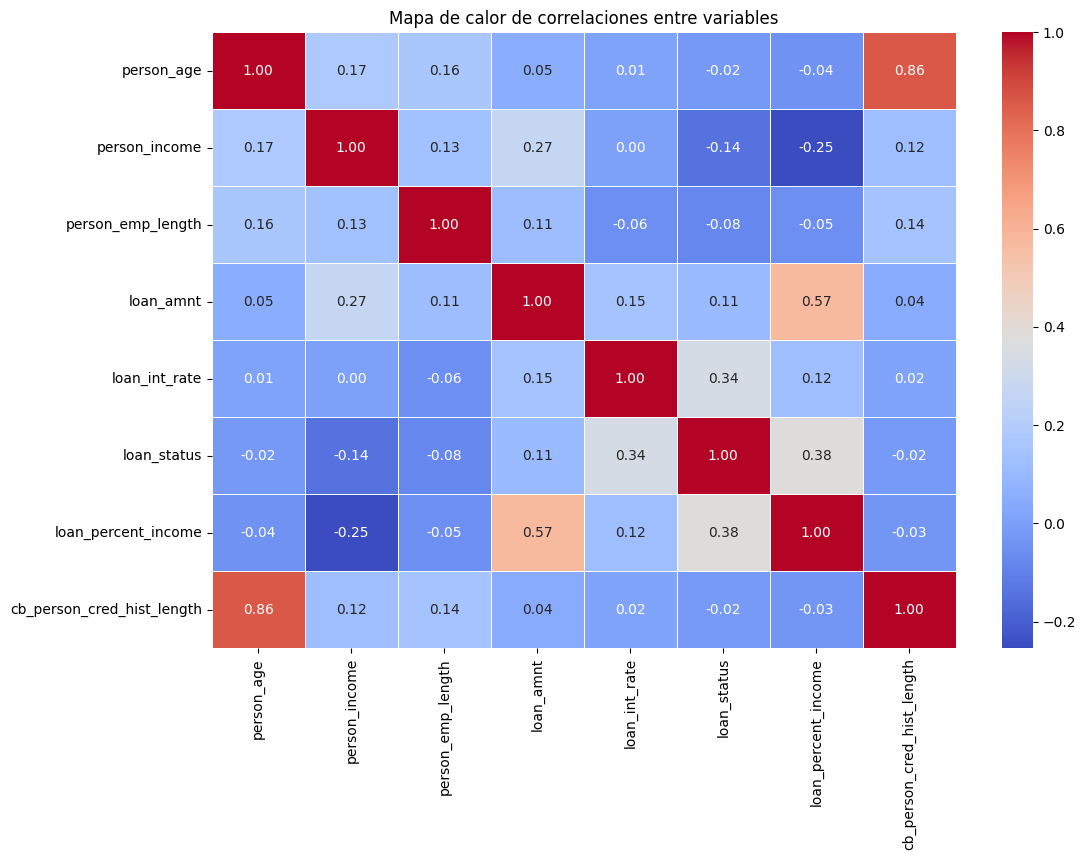

Variable con mayor correlación positiva con loan_status: loan_percent_income con un valor de: 0.37936646846126054
Variable con mayor correlación negativa con loan_status: person_income con un valor de: -0.14444948823455353


In [17]:
numeric_columns = df.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor de correlaciones entre variables')
plt.show()

correlation_with_loan_status = correlation_matrix['loan_status'].sort_values(ascending=False)

highest_positive_corr = correlation_with_loan_status[1:].idxmax()
highest_positive_value = correlation_with_loan_status[highest_positive_corr]

highest_negative_corr = correlation_with_loan_status.idxmin()
highest_negative_value = correlation_with_loan_status[highest_negative_corr]

print("Variable con mayor correlación positiva con loan_status:", highest_positive_corr, "con un valor de:", highest_positive_value)
print("Variable con mayor correlación negativa con loan_status:", highest_negative_corr, "con un valor de:", highest_negative_value)